## Goal of this notebook

In this notebook, i will attempt to fit a geodesic in the space of curves using the $F_{ab}$ function in http://arxiv.org/abs/1803.10894. This function gives us the ability to take a curve (for example, the outline of a cell shape) in the "space of curves" and transform it to "q-space". This is advantageous for us because "q-space" is a two dimensional flat euclidean space. Thus, if we transform the data into q space, then we can fit that data using a line (which is a geodesic in q space). If we want to make predictions about future data points in the "space of curves" then we can extrapolate the data in "q-space" using the line, and then we can transform that extrapolated data back into the "space of curves" using the inverse F transform. 

This is how we will fit/extrapolate data in this notebook. I will fit both synthetic and real datasets. 

## Metric used: Elastic Metric

I will be using the elastic metric to perform calculations on the "space of curves" (a manifold). The elastic metric is a good choice of metric for "curve space" analysis for several reasons:

1. It separates points on a manifold based on the amount of "bending/rigidity" or "stretching/tension" that exists between two curves. This provides a method of separating/placing curves on the manifold which is intuitive (intuitive is always good).
2. The elastic metric has two parameters: the "bending" parameter $b$ and the "stretching" parameter $a$. These parameters can be easily changed to tweak the metric.  When $a$ is large, then two curves that differ by a stretching operation will be far apart. When $b$ is large, two curves that differ by a bending operation wil be far apart.

I will repeat analysis for the synthetic and real datasets for several different elastic metric parameters $a$ and $b$.

# Begin dataset analysis:

In [7]:
#first, load relevant things:

import os

os.environ["GEOMSTATS_BACKEND"] = "pytorch"
import geomstats.backend as gs

#load discrete curves and R2 manifolds
from geomstats.geometry.discrete_curves import DiscreteCurves, R2

#specify the manifold that we are working on and give that manifold a metric (elastic metric)
#note that a and b are the parameters that we edit.
SPACE = DiscreteCurves(R2, a=1, b=1)
METRIC = SPACE.elastic_metric

# A. Synthetic Datasets

# 1. Transform the dataset of curves (c1,..., cT) into their corresponding "q's" using `f_transform`.

In [11]:
#import synthetic datasets

import dyn.dyn.datasets.synthetic as synthetic

n_geodesics = 5
n_times = 10
n_points = 40

#creating our synthetic dataset
geods_square_rect = synthetic.geodesics_square_to_rectangle(
    n_geodesics=n_geodesics, n_times=n_times, n_points=n_points
)

## 1.1 getting familiar with the dataset array

In [16]:
# From synthetic.py: 
#geodesics = gs.zeros((n_geodesics, n_times, n_points, dim))
#n_geodesics is the number of geodesics we want to calculate
#n_times is the number of times (or rather, the shape at that time) we want to "sample" on each geodesic
#n_points is the number of points on the curve.
#dim is the dimension of the curve. (for example, a 2D curve has dim=2)

print(geods_square_rect.shape)

torch.Size([5, 10, 40, 2])


In [15]:
#printing the first geodesic at the first time. this is the list of all of the coordinates of each point on the curve.

print(geods_square_rect[0,0,:,:])

tensor([[-0.9874, -0.9874],
        [-0.7899, -0.9874],
        [-0.5924, -0.9874],
        [-0.3950, -0.9874],
        [-0.1975, -0.9874],
        [ 0.0000, -0.9874],
        [ 0.1975, -0.9874],
        [ 0.3950, -0.9874],
        [ 0.5924, -0.9874],
        [ 0.7899, -0.9874],
        [ 0.9874, -0.9874],
        [ 0.9874, -0.7899],
        [ 0.9874, -0.5924],
        [ 0.9874, -0.3950],
        [ 0.9874, -0.1975],
        [ 0.9874,  0.0000],
        [ 0.9874,  0.1975],
        [ 0.9874,  0.3950],
        [ 0.9874,  0.5924],
        [ 0.9874,  0.7899],
        [ 0.9874,  0.9874],
        [ 0.7899,  0.9874],
        [ 0.5924,  0.9874],
        [ 0.3950,  0.9874],
        [ 0.1975,  0.9874],
        [ 0.0000,  0.9874],
        [-0.1975,  0.9874],
        [-0.3950,  0.9874],
        [-0.5924,  0.9874],
        [-0.7899,  0.9874],
        [-0.9874,  0.9874],
        [-0.9874,  0.7899],
        [-0.9874,  0.5924],
        [-0.9874,  0.3950],
        [-0.9874,  0.1975],
        [-0.9874,  0

In [17]:
from matplotlib import pyplot as plt

In [28]:
data =  geods_square_rect[0,0,:,:].numpy()
print(data)

[-0.9873839 -0.9873839]


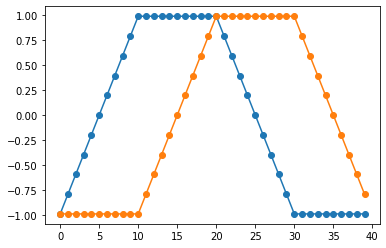

In [26]:
plt.plot(data,marker="o")